In [80]:
import keras
import numpy as np
import os
import h5py
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import namedtuple
from matplotlib.colors import LogNorm

Option = namedtuple("MyStruct", "inputModel inputFile tree config ")
options = Option(
    inputModel = 'KERAS_conv1d_weights.h5',
    inputFile = 'processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth.z',
    tree = 't_allpar_new',
    config = 'train_config_conv1d-Copy1.yml',
)

print("Loading configuration from", options.config)
config = open(options.config, 'r')
yamlConfig =  yaml.load(config, Loader = yaml.FullLoader)
yamlConfig

Loading configuration from train_config_conv1d-Copy1.yml


{'Inputs': ['j1_ptrel',
  'j1_etarot',
  'j1_phirot',
  'j1_erel',
  'j1_deltaR',
  'j1_costhetarel',
  'j1_pdgid'],
 'Labels': ['j_g', 'j_q', 'j_w', 'j_z', 'j_t', 'j_undef'],
 'KerasModel': 'conv1d_model',
 'KerasModelRetrain': 'conv1d_model_constraint',
 'KerasLoss': 'categorical_crossentropy',
 'L1Reg': 0.0001,
 'NormalizeInputs': 1,
 'InputType': 'Conv1D',
 'MaxParticles': 100}

In [35]:
f = h5py.File(options.inputFile, 'r')
treeArray = f[options.tree][()]

features = yamlConfig['Inputs']
labels = yamlConfig['Labels']

features_labels_df = pd.DataFrame(treeArray,columns = labels)
labels_val = features_labels_df[labels].values

# Count Jets

In [36]:
g = 0
q = 0
w = 0
z = 0
t = 0
u = 0
for i in range (len(labels_val)):
    if labels_val[i,0] == 1:
        g = g + 1 
    elif labels_val[i,1] == 1:
        q = q + 1 
    elif labels_val[i,2] == 1:
        w = w + 1
    elif labels_val[i,3] == 1:
        z = z + 1
    elif labels_val[i,4] == 1:
        t = t + 1
    elif labels_val[i,5] == 1:
        u = u + 1
print (g,q,w,z,t,u)    
print (g +q +w+z+t+u)


1390520 777373 798451 834146 1319419 0
5119909


| Label | Number of jets | Description |
| :----: | :----: | :----: |
| Total | 5119909 | Total statistics |
| q | 777373 | Light (up, down, strange)-quark jet |
| g | 1390520 | Gluon jet |
| w | 798451 | W-boson jet |
| z | 834146 | Z-boson jet |
| t | 1319419 | Top-quark jet |
| undef | 0 | Undefined jet 

# 1D distributions

In [37]:
def plot_1D(feature):
    
    features = [feature] + labels
    features_df = pd.DataFrame(treeArray,columns = features)
    val = features_df[features].values

    q = []
    g = []
    w = []
    z = []
    t = []

    for x in val:
        if x[1] == 1:
            g.append(x[0])
        if x[2] == 1:
            q.append(x[0])
        if x[3] == 1:
            w.append(x[0])
        if x[4] == 1:
            z.append(x[0])
        if x[5] == 1:
            t.append(x[0])
    plt.hist(g,100,histtype='step',density = True, label = 'gluon',color = 'blue')
    plt.hist(q,100,histtype='step',density = True, label = 'quark',color = 'red')
    plt.hist(w,100,histtype='step',density = True, label = 'W',color = 'black')
    plt.hist(z,100,histtype='step',density = True, label = 'Z',color = 'green')
    plt.hist(t,100,histtype='step',density = True, label = 'top',color = 'purple')
    plt.xlabel(feature)
    plt.ylabel('Prob Density')
    plt.legend()
    plt.show()

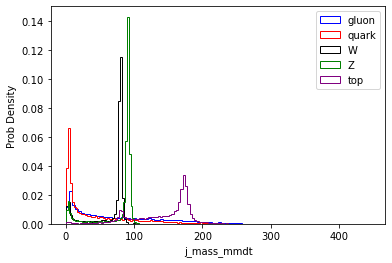

In [38]:
plot_1D('j_mass_mmdt')

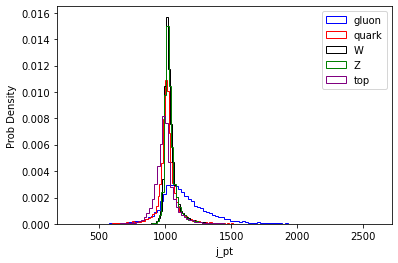

In [39]:
plot_1D('j_pt')

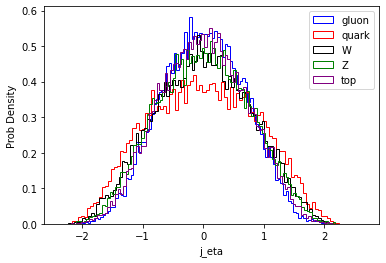

In [40]:
plot_1D('j_eta')

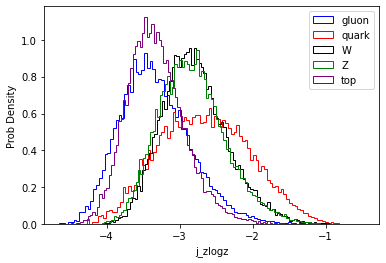

In [42]:
plot_1D('j_zlogz')

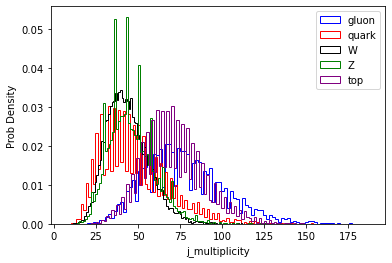

In [43]:
plot_1D('j_multiplicity')

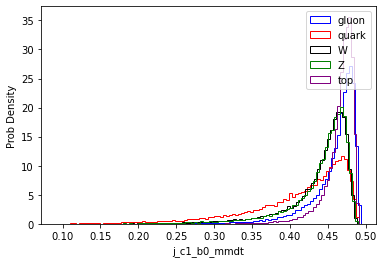

In [44]:
plot_1D('j_c1_b0_mmdt')

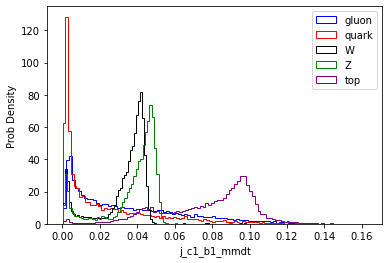

In [46]:
plot_1D('j_c1_b1_mmdt')

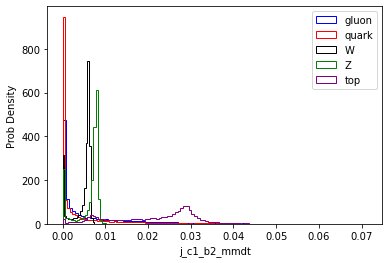

In [48]:
plot_1D('j_c1_b2_mmdt')

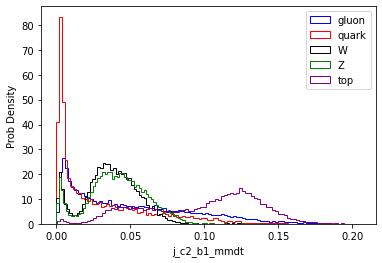

In [49]:
plot_1D('j_c2_b1_mmdt')

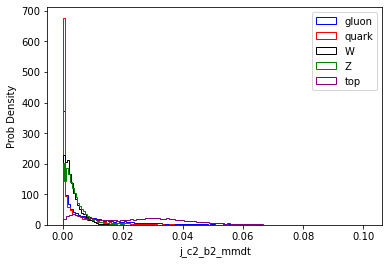

In [50]:
plot_1D('j_c2_b2_mmdt')

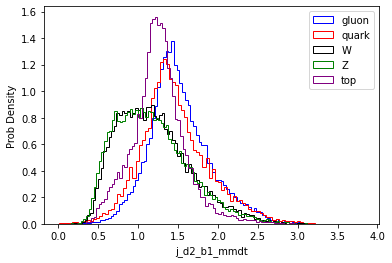

In [51]:
plot_1D('j_d2_b1_mmdt')

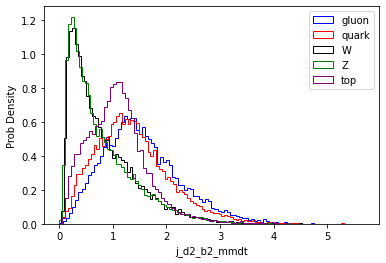

In [52]:
plot_1D('j_d2_b2_mmdt')

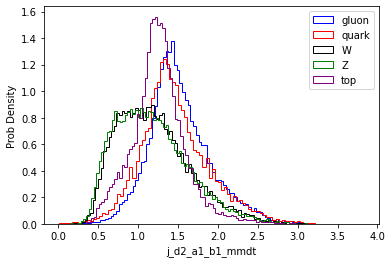

In [53]:
plot_1D('j_d2_a1_b1_mmdt')

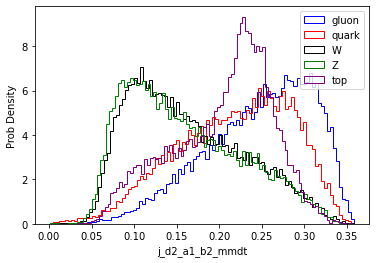

In [54]:
plot_1D('j_d2_a1_b2_mmdt')

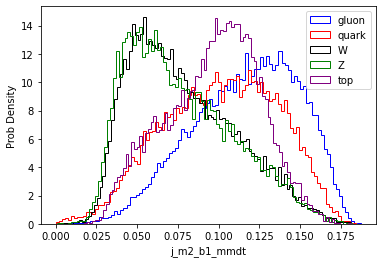

In [55]:
plot_1D('j_m2_b1_mmdt')

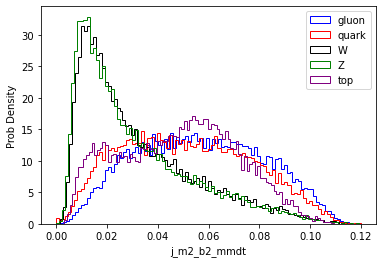

In [56]:
plot_1D('j_m2_b2_mmdt')

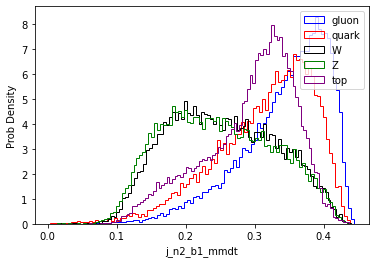

In [57]:
plot_1D('j_n2_b1_mmdt')

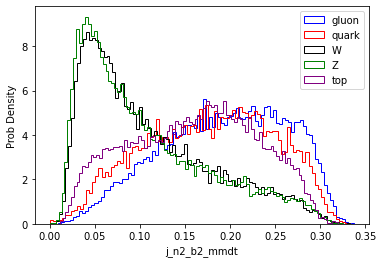

In [58]:
plot_1D('j_n2_b2_mmdt')

# Low Level

In [61]:
def plot_1D_low(feature):
    
    features = [feature] + labels
    features_df = pd.DataFrame(treeArray,columns = features)
    val = features_df[features].values

    q = []
    g = []
    w = []
    z = []
    t = []

    for x in val:
        if x[1] == 1:
            g.append(x[0])
        if x[2] == 1:
            q.append(x[0])
        if x[3] == 1:
            w.append(x[0])
        if x[4] == 1:
            z.append(x[0])
        if x[5] == 1:
            t.append(x[0])
    plt.hist(g,100,histtype='step',density = True,log=True, label = 'gluon',color = 'blue')
    plt.hist(q,100,histtype='step',density = True,log=True, label = 'quark',color = 'red')
    plt.hist(w,100,histtype='step',density = True,log=True, label = 'W',color = 'black')
    plt.hist(z,100,histtype='step',density = True,log=True, label = 'Z',color = 'green')
    plt.hist(t,100,histtype='step',density = True,log=True, label = 'top',color = 'purple')
    plt.xlabel(feature)
    plt.ylabel('Prob Density')
    plt.legend()
    plt.show()

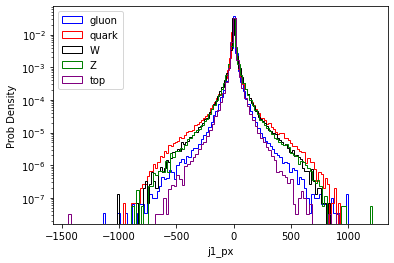

In [62]:
plot_1D_low('j1_px')

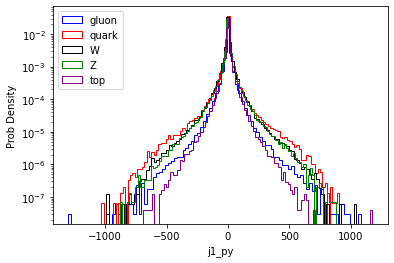

In [63]:
plot_1D_low('j1_py')

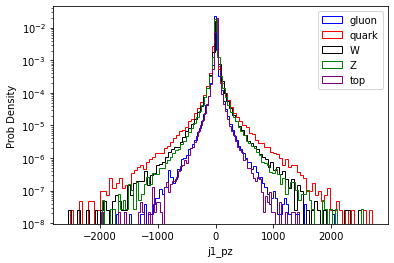

In [64]:
plot_1D_low('j1_pz')

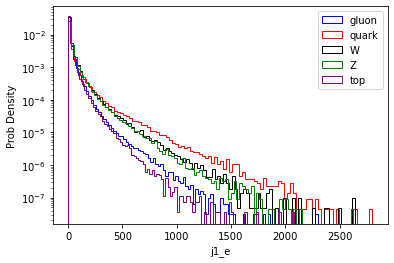

In [65]:
plot_1D_low('j1_e')

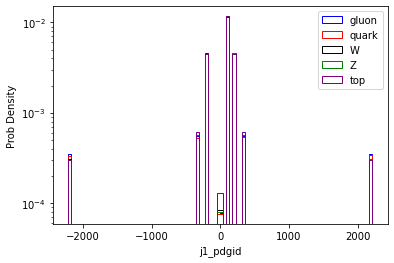

In [66]:
plot_1D_low('j1_pdgid')

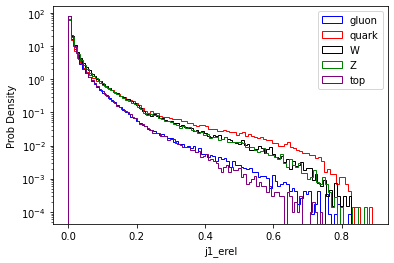

In [67]:
plot_1D_low('j1_erel')

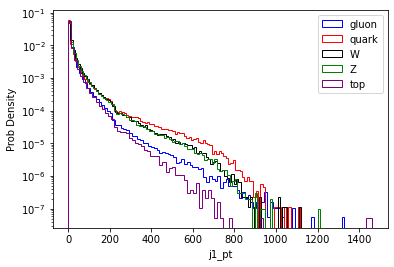

In [68]:
plot_1D_low('j1_pt')

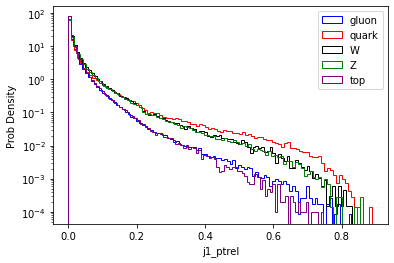

In [69]:
plot_1D_low('j1_ptrel')

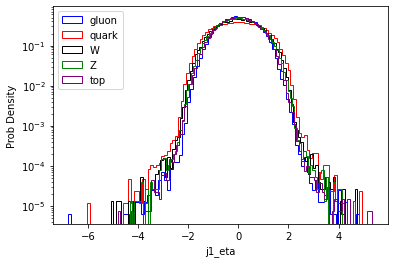

In [70]:
plot_1D_low('j1_eta')

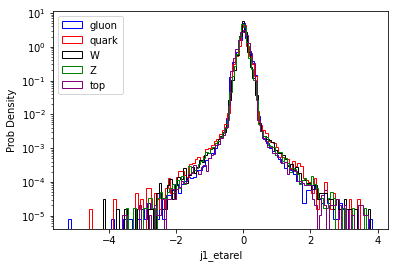

In [71]:
plot_1D_low('j1_etarel')

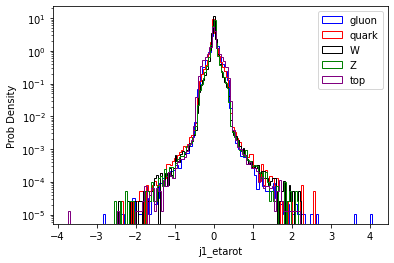

In [72]:
plot_1D_low('j1_etarot')

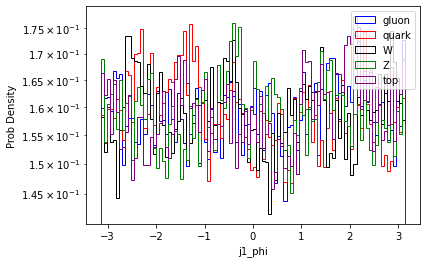

In [73]:
plot_1D_low('j1_phi')

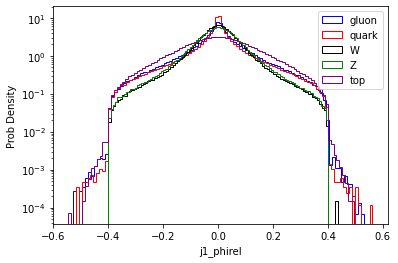

In [74]:
plot_1D_low('j1_phirel')

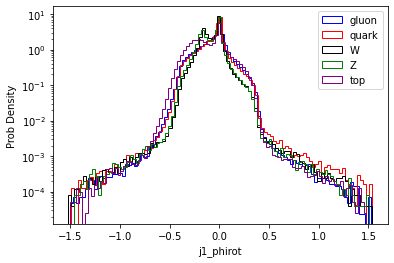

In [75]:
plot_1D_low('j1_phirot')

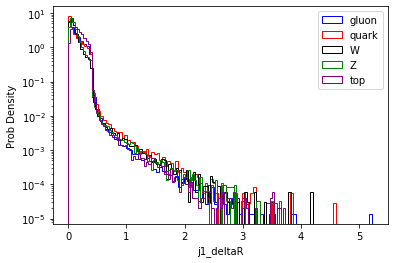

In [76]:
plot_1D_low('j1_deltaR')

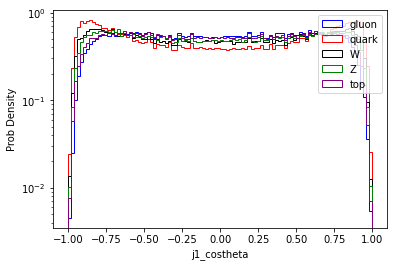

In [79]:
plot_1D_low('j1_costheta')

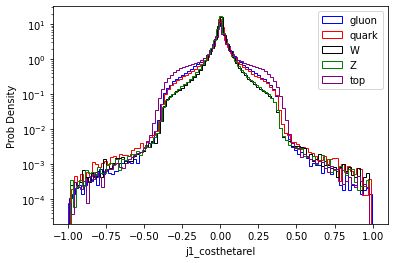

In [78]:
plot_1D_low('j1_costhetarel')

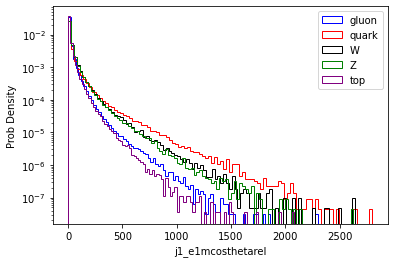

In [77]:
plot_1D_low('j1_e1mcosthetarel')

# 2D distribution

In [92]:
features = ['j1_px', 'j1_py', 'j1_pz', 'j1_e', 'j1_pdgid', 'j1_erel', 'j1_pt', 'j1_ptrel', 'j1_eta', 'j1_etarel', 'j1_etarot', 'j1_phi', 'j1_phirel', 'j1_phirot', 'j1_deltaR', 'j1_costheta', 'j1_costhetarel', 'j1_e1mcosthetarel']
features_df = pd.DataFrame(treeArray, columns = features + labels)

def plot_2d_jet_etarot_j1_phirot(label):
    plt.hist2d(x = features_df[features_df[label] == 1].j1_etarot,
               y = features_df[features_df[label] == 1].j1_phirot,
               weights = features_df[features_df[label] == 1].j1_ptrel,
               bins = 100,
               norm=LogNorm())
    plt.colorbar()
    plt.title('Histogram2D for ' + label + ' jet weighted by j1_ptrel')
    plt.xlabel('j1_etarot')
    plt.ylabel('j1_phirot')
    plt.show()
    
def plot_2d_jet_eta_j1_phi(label):
    plt.hist2d(x = features_df[features_df[label] == 1].j1_eta,
               y = features_df[features_df[label] == 1].j1_phi,
               weights = features_df[features_df[label] == 1].j1_ptrel,
               bins = 100,
               norm=LogNorm())
    plt.colorbar()
    plt.title('Histogram2D for ' + label + ' jet weighted by j1_ptrel')
    plt.xlabel('j1_jet_eta')
    plt.ylabel('j1_phi')
    plt.show()
    

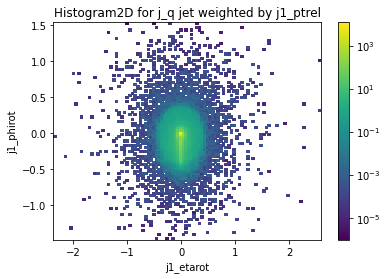

In [85]:
plot_2d_jet_etarot_j1_phirot('j_q') 

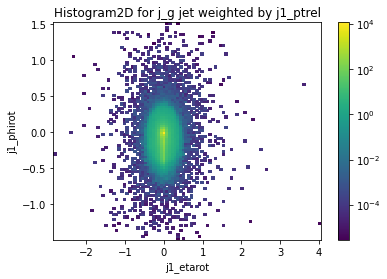

In [86]:
plot_2d_jet_etarot_j1_phirot('j_g')

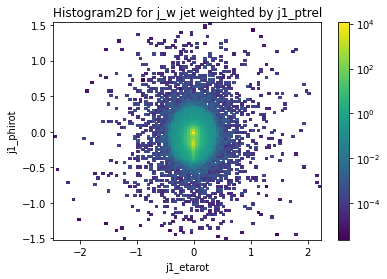

In [87]:
plot_2d_jet_etarot_j1_phirot('j_w')

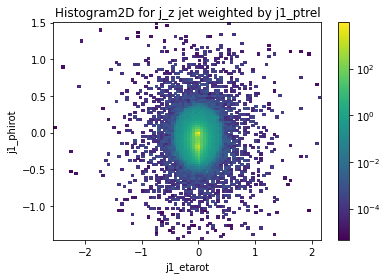

In [88]:
plot_2d_jet_etarot_j1_phirot('j_z')

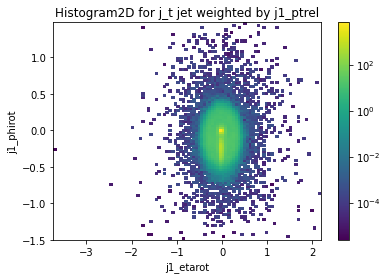

In [89]:
plot_2d_jet_etarot_j1_phirot('j_t')

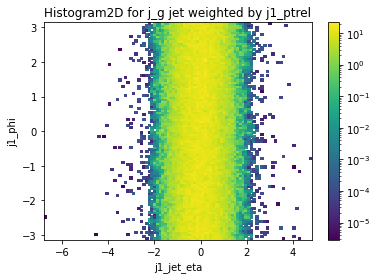

In [93]:
plot_2d_jet_eta_j1_phi('j_g')

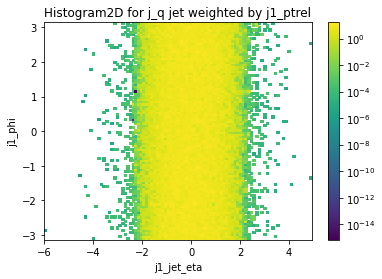

In [94]:
plot_2d_jet_eta_j1_phi('j_q')

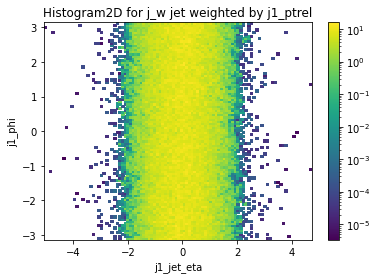

In [95]:
plot_2d_jet_eta_j1_phi('j_w')

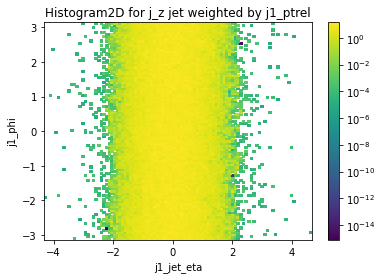

In [96]:
plot_2d_jet_eta_j1_phi('j_z')

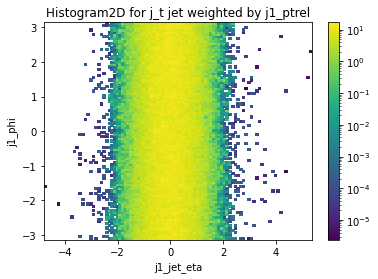

In [97]:
plot_2d_jet_eta_j1_phi('j_t')